In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'

In [202]:
path = './insurance.csv'

In [203]:
df = pd.read_csv(path)
print(f'# of rows & columns in the data set: {df.shape}')

# of rows & columns in the data set: (1338, 7)


In [204]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [205]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [206]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [207]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 변수 간 단순 관계 확인 : sns.pairplot
- Seaborn에서 여러 변수 간 관계를 시작적으로 탐색하는 함수
- df의 숫자형 변수들의 모든 가능한 조합에 대해 산점도 및 히스토그램을 그려준다.

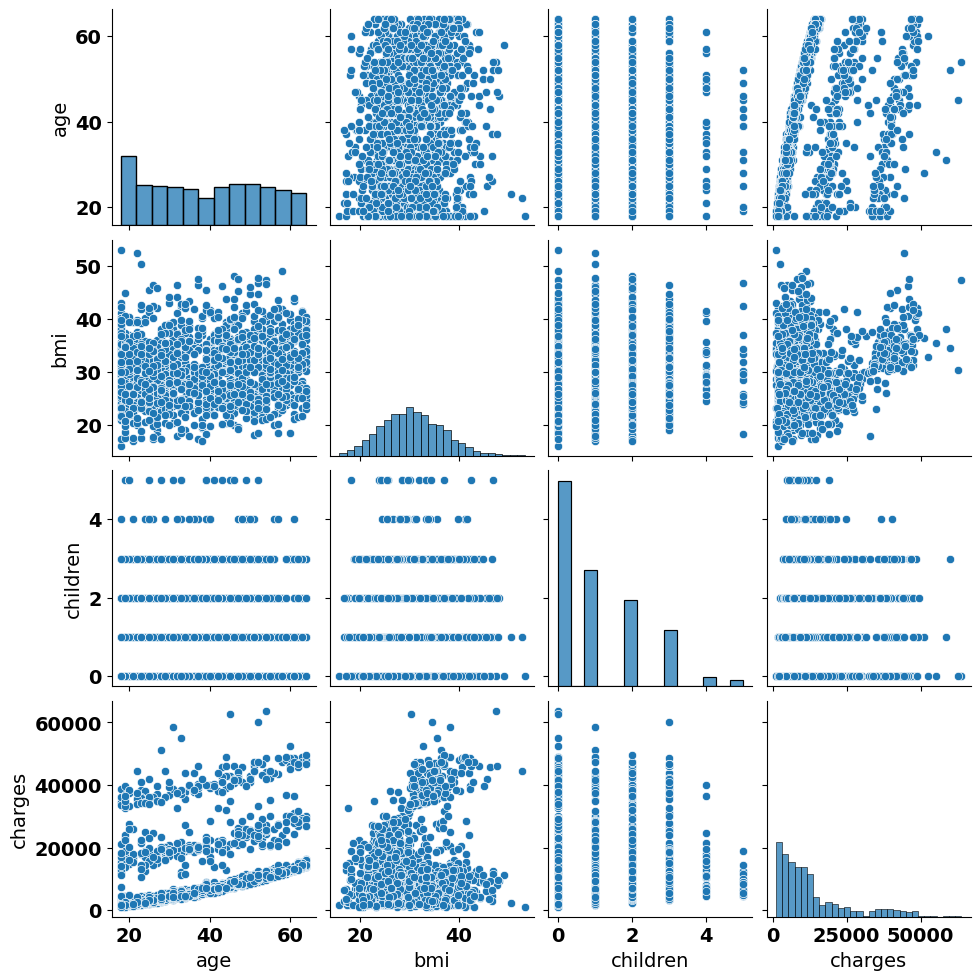

In [208]:
sns.pairplot(df)
plt.show()

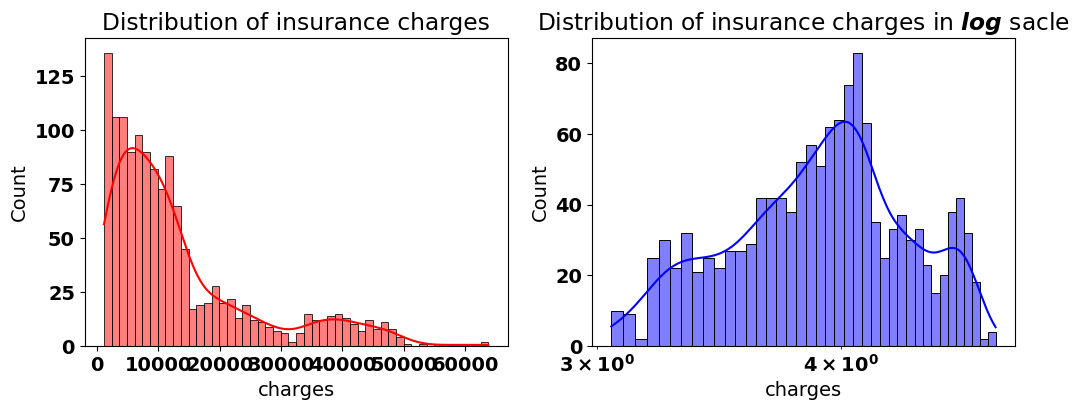

In [209]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(df['charges'],bins=50,color='r',ax=ax, kde=True)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.histplot(np.log10(df['charges']),bins=40,color='b',ax=ax, kde=True)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

C:\Users\LJH\AppData\Local\Temp\ipykernel_18912\3263356476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
C:\Users\LJH\AppData\Local\Temp\ipykernel_18912\3263356476.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)


Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

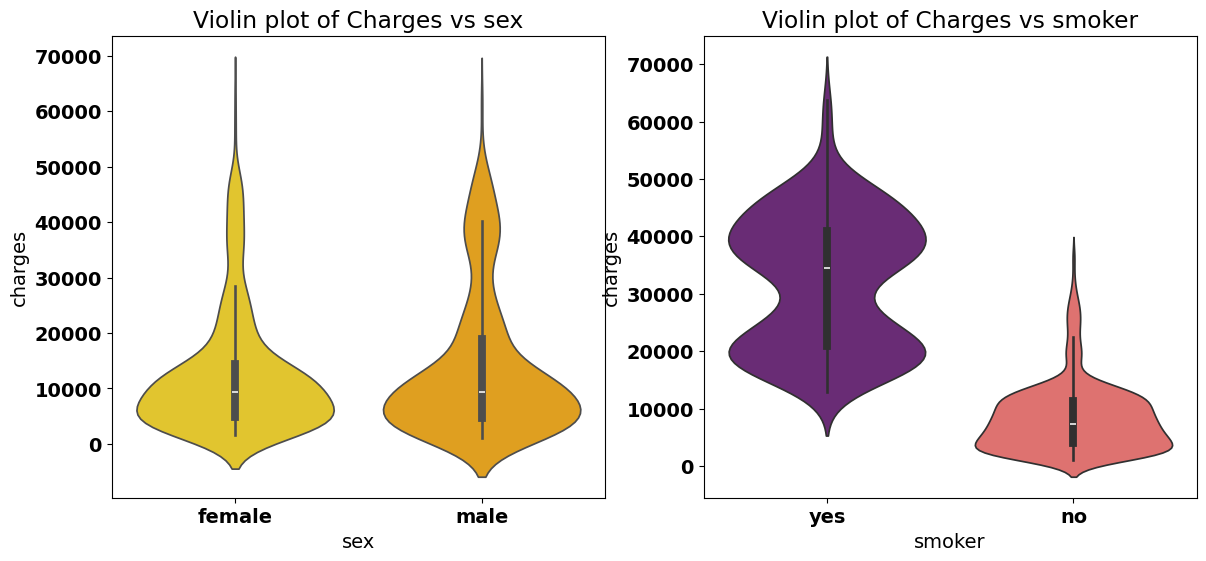

In [210]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

Text(0.5, 1.0, 'Box plot of charges vs children')

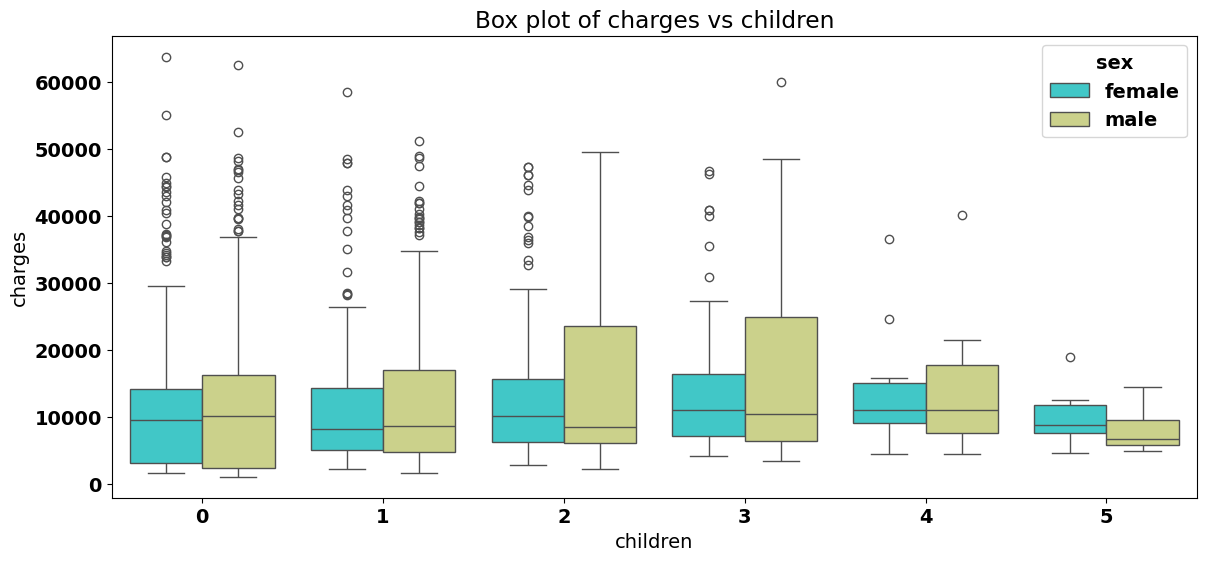

In [211]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children')

Text(0.5, 1.0, 'Box plot of charges vs children')

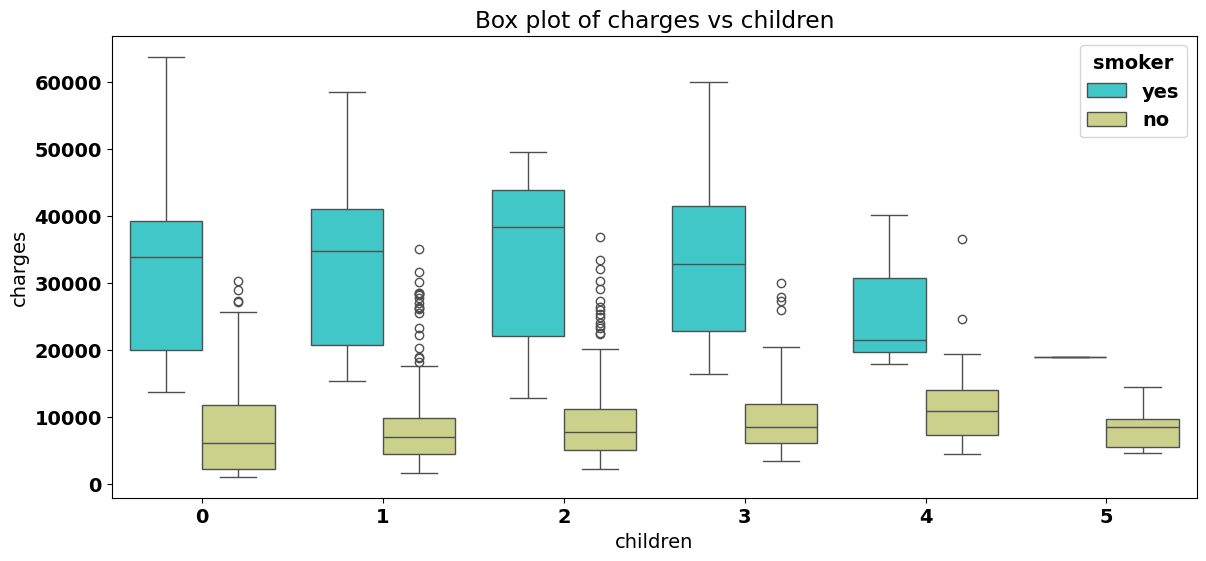

In [212]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='smoker',data=df,palette='rainbow')
plt.title('Box plot of charges vs children')

In [213]:
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')
df.groupby('children')['charges'].agg(['mean','min','max'])

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Violin plot of Charges vs Region')

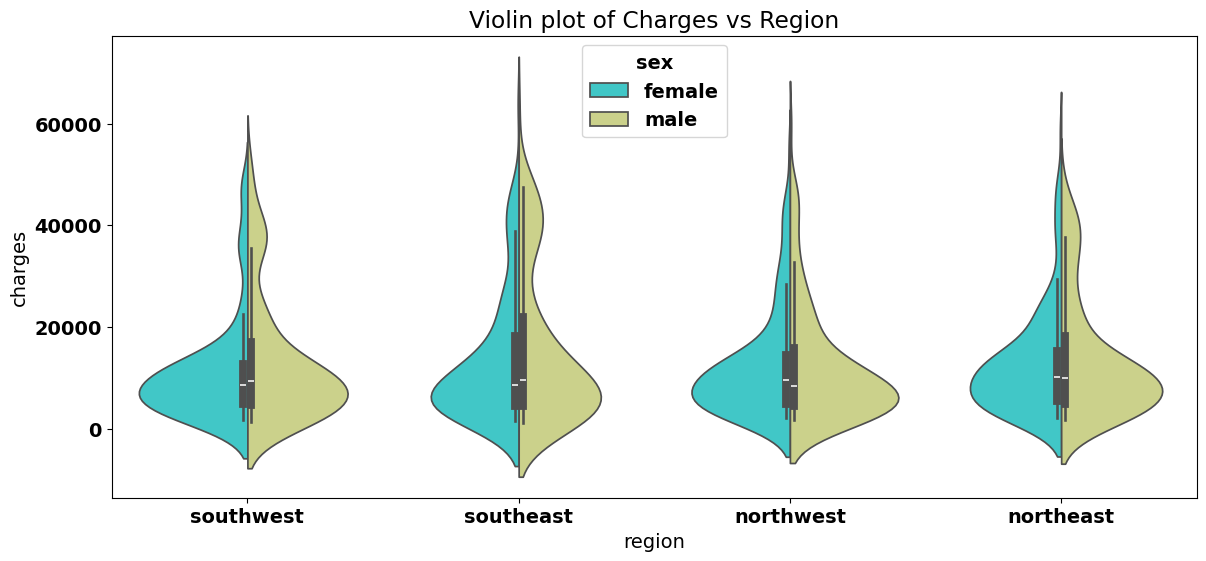

In [214]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges', hue='sex', data=df, palette='rainbow', split=True)
plt.title('Violin plot of Charges vs Region')

Text(0.5, 1.0, 'Scatter plot of Charges vs BMI')

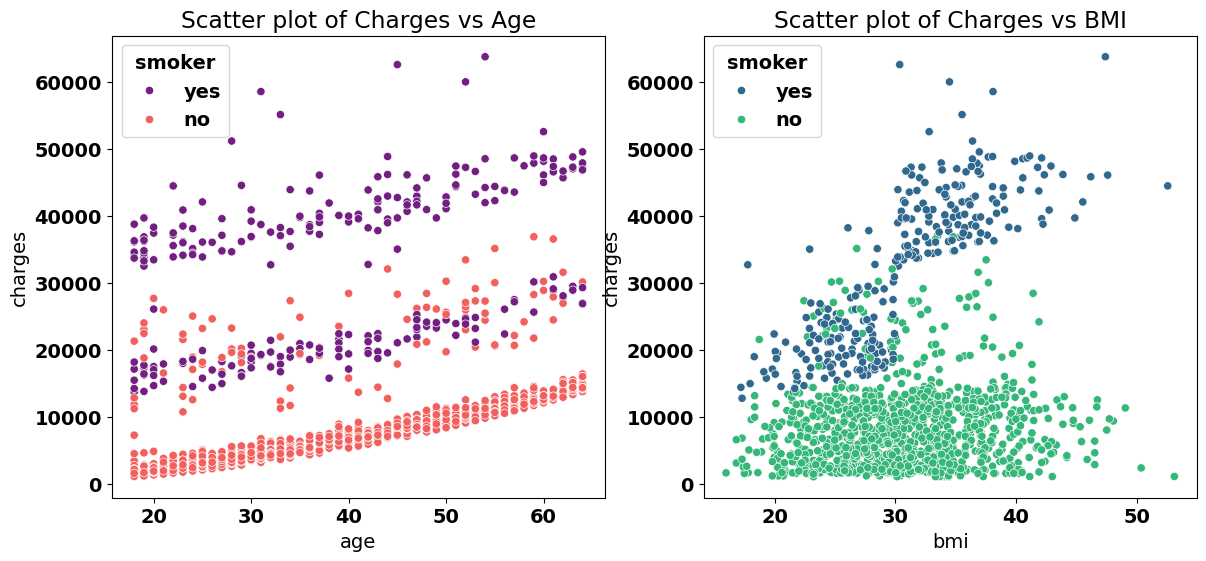

In [215]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='magma', ax=ax)
ax.set_title('Scatter plot of Charges vs Age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='viridis', ax=ax)
ax.set_title('Scatter plot of Charges vs BMI')

In [216]:
categorical_columns = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
                           columns=categorical_columns,
                           drop_first=True, # 첫번째 범주를 제거하여 다중공선성 방지지
                           dtype='int8')

In [217]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [218]:
print(df['sex'].unique())
print(df['children'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
[0 1 3 2 5 4]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


### [DATA PREPROCESSING] BOX-COX 변환
- 데이터 정규화
- 분산 안정화
- 데이터 선형화

In [219]:
from scipy.stats import boxcox

y_bc, lam, ci = boxcox(df_encode['charges'], alpha=0.05)

'''
boxcox : charges 컬럼에 boxcox 변환 적용
y_bc : 변환된 데이터
lam : 최적의 람다
ci : 람다의 신뢰 구간
'''

lam, ci
y_bc[0], df_encode['charges'][0], np.log10(df_encode['charges'][0])

(np.float64(12.128980207663563),
 np.float64(16884.924),
 np.float64(4.22749911019175))

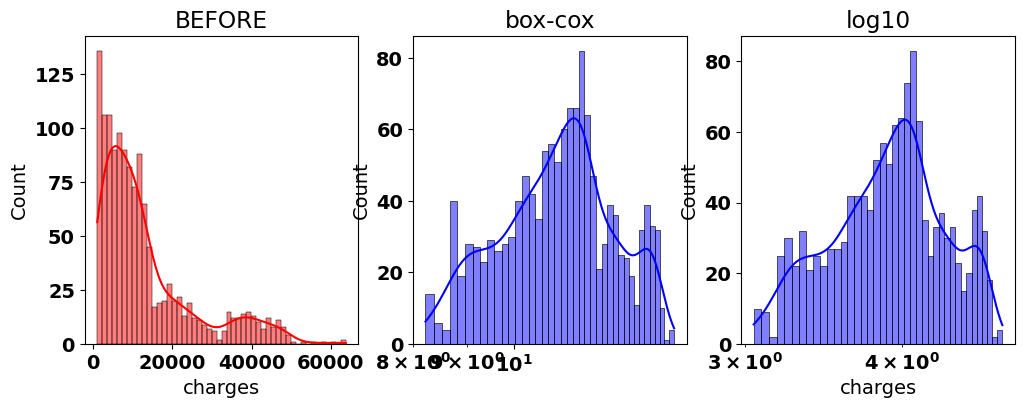

In [220]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(131)
sns.histplot(df['charges'],bins=50,color='r',ax=ax, kde=True)
ax.set_title('BEFORE')

ax=f.add_subplot(132)
sns.histplot(y_bc,bins=40,color='b',ax=ax, kde=True)
ax.set_title('box-cox')
ax.set_xscale('log')

ax=f.add_subplot(133)
sns.histplot(np.log10(df_encode['charges']),bins=40,color='b',ax=ax, kde=True)
ax.set_title('log10')
ax.set_xscale('log')

In [221]:
df_encode['charges'] = y_bc
# df_encode['charges'] = np.log(df_encode['charges'])
# df_encode['charges'] = np.log10(df_encode['charges'])

In [222]:
df_encode.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,12.128980,0,0,0,0,0,0,1,0,0,1
1,18,33.770,8.808597,1,1,0,0,0,0,0,0,1,0
2,28,33.000,10.147521,1,0,0,1,0,0,0,0,1,0
3,33,22.705,12.534951,1,0,0,0,0,0,0,1,0,0
4,32,28.880,9.945637,1,0,0,0,0,0,0,1,0,0


### TRAIN / TEST SPLIT

In [223]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = df_encode.drop('charges', axis=1)
x = sm.add_constant(X)
y = df_encode['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

x_train.tail()

,const,age,bmi,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
31,1.0,18,26.315,0,0,0,0,0,0,0,0,0,0
950,1.0,57,18.335,1,0,0,0,0,0,0,0,0,0
1064,1.0,29,25.600,0,0,0,0,1,0,0,0,0,1
742,1.0,53,34.105,1,0,0,0,0,0,1,0,0,0
595,1.0,46,33.725,0,1,0,0,0,0,0,0,0,0


### Model Building

In [224]:
theta = np.linalg.inv(x_train.T @ x_train)@x_train.T@y_train

theta.shape

(13,)

In [225]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(x_train.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [226]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,8.169890,8.169890
1,theta_1,age,0.048393,0.000000
2,theta_2,bmi,0.020951,0.048393
3,theta_3,OHE_male,-0.095708,0.020951
4,theta_4,OHE_1,0.210252,-0.095708
5,theta_5,OHE_2,0.392036,0.210252
6,theta_6,OHE_3,0.349699,0.392036
7,theta_7,OHE_4,0.762389,0.349699
8,theta_8,OHE_5,0.666533,0.762389
9,theta_9,OHE_yes,2.339017,0.666533


### Model Evaluation

In [227]:
theta = np.array(theta).reshape(-1, 1)
x_test.shape, theta.shape


((402, 13), (13, 1))

In [228]:
# Normal Equation
y_pred_norm = x_test@theta
J_mse = np.sum((y_pred_norm - y_test)**2)/x_train.shape[0]

sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)

print(f'The Mean Square Error(MSE) or J(theta) is: {J_mse}')
print(f'R square obtain for normal equation method is: {R_square}')


The Mean Square Error(MSE) or J(theta) is: 0       1.019283
2       0.000000
3       0.000000
9       0.000000
17      0.000000
          ...   
1315    0.000000
1320    0.000000
1323    0.000000
1326    0.000000
1336    0.000000
Length: 402, dtype: float64
R square obtain for normal equation method is: 0      -0.269758
2       1.000000
3       1.000000
9       1.000000
17      1.000000
          ...   
1315    1.000000
1320    1.000000
1323    1.000000
1326    1.000000
1336    1.000000
Length: 402, dtype: float64


C:\Users\LJH\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [229]:
# sklearn regression module
y_pred_sk = lin_reg.predict(x_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(x_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

J_mse_sk

The Mean Square Error(MSE) or J(theta) is:  0.40937072265783
R square obtain for scikit learn library is : 0.7809752869585052


0.40937072265783

In [230]:
def mean_squared_error_(y_pred, y):
    return sum((y_pred-y)**2 / y_pred.shape[0])

In [231]:
mse = mean_squared_error_(y_pred_sk, y_test)

mse

0.40937072265783

In [232]:
type(y_test)

pandas.core.series.Series

In [233]:
def R_square_(y_pred, y):
    y_mean = y.mean()
    y_pred_mean = y_pred.mean()
    ess = sum((y_pred-y_pred_mean)**2)
    rss = sum((y-y_pred)**2)
    tss = sum((y-y_mean)**2)
    # return 1 - rss/tss
    return ess/tss

In [234]:
rs = R_square_(y_pred_sk, y_test)

rs #0.7809752869585052

np.float64(0.7016722014451757)

### Model Validation

Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual eror')

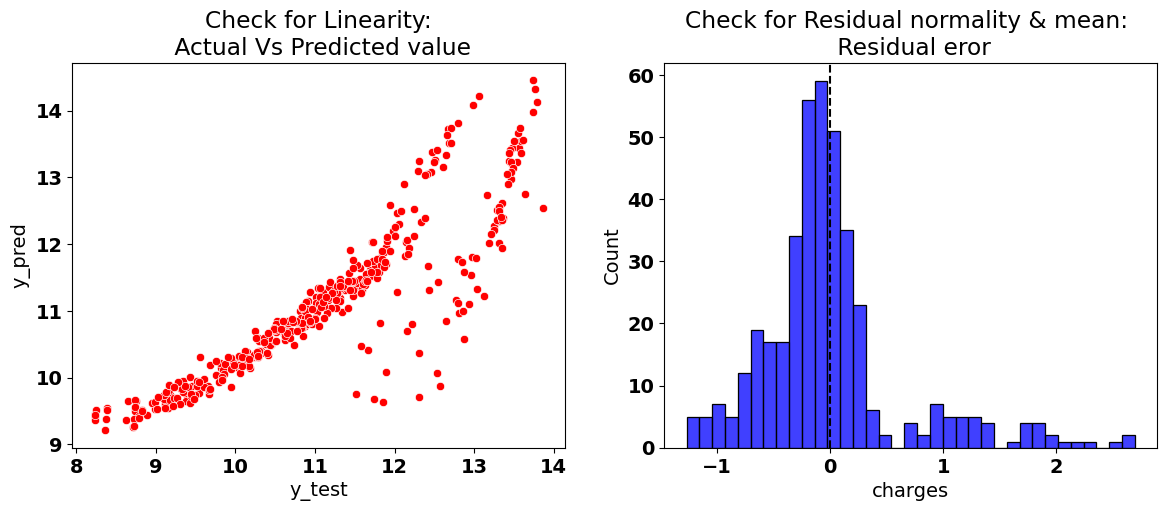

In [250]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test,y=y_pred_sk,ax=ax,color='r')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')    # 잔차의 평균
ax.set_title('Check for Residual normality & mean: \n Residual eror')

Text(0.5, 1.0, 'Check for Homoscedasticity: \nResidual Vs Predicted')

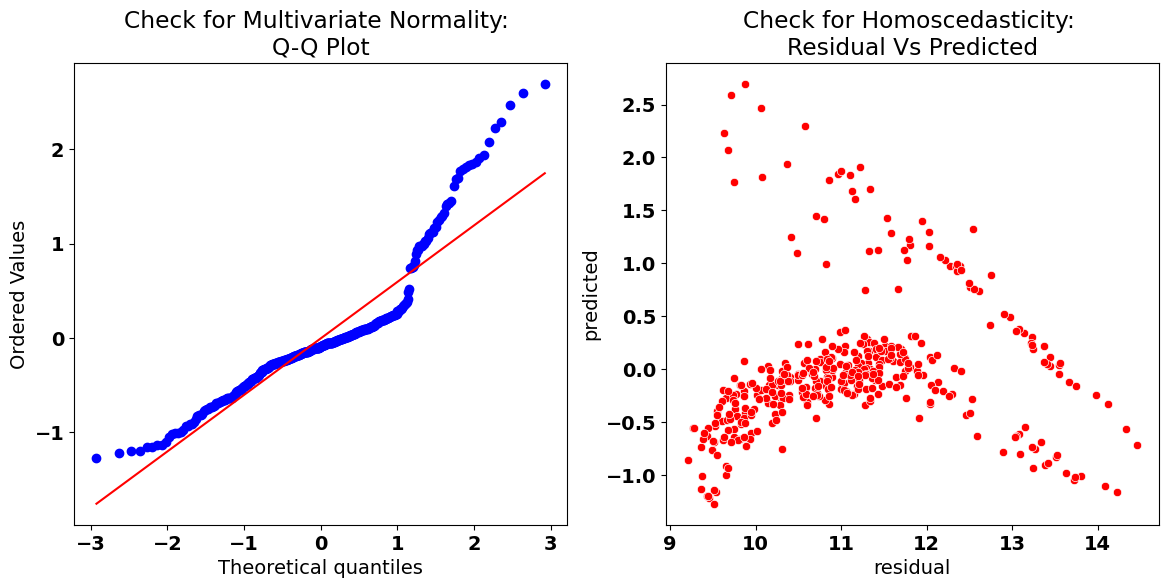

In [241]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity (등분산성)
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r')
ax[1].set_xlabel('residual')
ax[1].set_ylabel('predicted')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted')

In [242]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.565694830110551

### Skewed Data와 로그 변환
- Skewed Data : 오른쪽으로 치우쳐진 데이터
    - 작은 값이 많고, 일부 극단적으로 큰 값이 존재
    - 오른쪽 꼬리가 길어서 정규 분포와 거리가 멀다
- Skewed Data에 분석 기법을 적용하면 이상치(outlier)의 영향을 크게 받아 왜곡된 결과가 나올 수 있다.

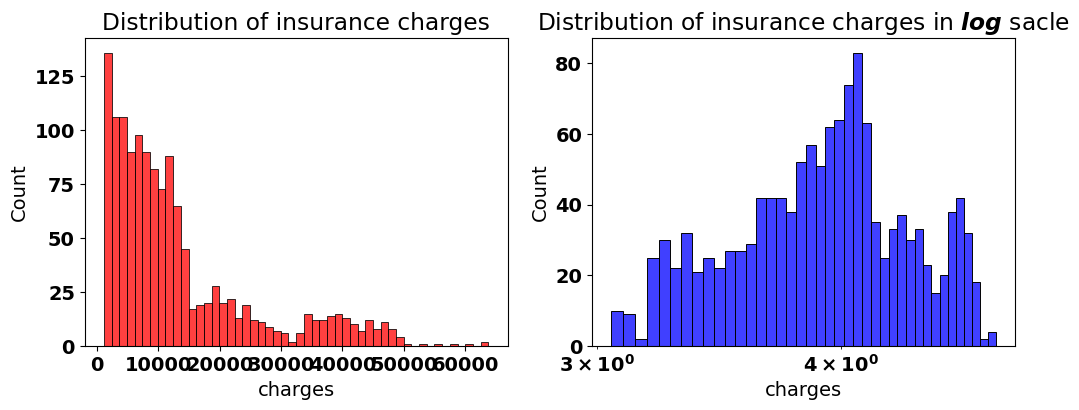

In [235]:
f=plt.figure(figsize=(12,4))

ax1 = f.add_subplot(121)
sns.histplot(df['charges'], bins=50, color='r', ax=ax1)
ax1.set_title('Distribution of insurance charges')

ax2 = f.add_subplot(122)
sns.histplot(np.log10(df['charges']),bins=40,color='b',ax=ax2)
ax2.set_title('Distribution of insurance charges in $log$ sacle')
ax2.set_xscale('log')